In [9]:
import pandas as pd
import numpy as np

# Load the dataset
file_path =  r"C:\Users\sharm\Desktop\ML\ML LAB\DCT_withoutduplicate 5.csv"
df = pd.read_csv(file_path, encoding='ascii')

# Separate features and labels
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # The last column (LABEL)

# Import the necessary functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now let's implement the neural network components

def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(predicted, actual):
    return np.mean((predicted - actual) ** 2)

# Let's create a simple neural network with one hidden layer
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)
    
    def forward(self, X):
        self.hidden = sigmoid_activation(summation_unit(X, self.weights1))
        self.output = sigmoid_activation(summation_unit(self.hidden, self.weights2))
        return self.output
    
    def train(self, X, y, learning_rate, epochs):
        for _ in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backpropagation
            d_output = (output - y) * output * (1 - output)
            d_hidden = np.dot(d_output, self.weights2.T) * self.hidden * (1 - self.hidden)
            
            # Update weights
            self.weights2 -= learning_rate * np.dot(self.hidden.T, d_output)
            self.weights1 -= learning_rate * np.dot(X.T, d_hidden)

# Initialize and train the network
input_size = X_train_scaled.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.01
epochs = 1000

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train_scaled, y_train.reshape(-1, 1), learning_rate, epochs)

# Make predictions
train_predictions = nn.forward(X_train_scaled)
test_predictions = nn.forward(X_test_scaled)

# Calculate errors
train_mse = mean_squared_error(train_predictions, y_train.reshape(-1, 1))
test_mse = mean_squared_error(test_predictions, y_test.reshape(-1, 1))

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

# Display some sample predictions
print("\
Sample Predictions:")
for i in range(5):
    print(f"Actual: {y_test[i]}, Predicted: {test_predictions[i][0]:.4f}")

C:\Users\sharm\AppData\Local\Temp\ipykernel_19264\963194471.py:30: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training MSE: 11375175.647777777
Testing MSE: 11367297.76
Sample Predictions:
Actual: 3366, Predicted: 1.0000
Actual: 3353, Predicted: 1.0000
Actual: 3356, Predicted: 1.0000
Actual: 3346, Predicted: 1.0000
Actual: 3379, Predicted: 1.0000


Converged after 130 epochs.


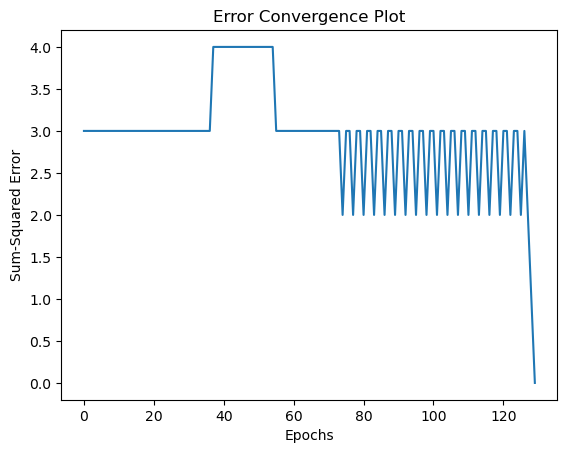

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Step Activation Function
def step_activation(x):
    return 1 if x >= 0 else 0

# Define the Perceptron Model
class Perceptron:
    def __init__(self, learning_rate=0.05):
        # Initialize weights as given
        self.W0 = 10    # Bias term
        self.W1 = 0.2   # Weight for first input
        self.W2 = -0.75 # Weight for second input
        self.lr = learning_rate  # Learning rate
    
    def predict(self, x1, x2):
        # Weighted sum of inputs (including bias)
        weighted_sum = self.W0 + self.W1 * x1 + self.W2 * x2
        return step_activation(weighted_sum)
    
    def train(self, X, Y, epochs=1000, convergence_error=0.002):
        epoch_errors = []
        
        for epoch in range(epochs):
            total_error = 0
            for x, y in zip(X, Y):
                x1, x2 = x
                # Predict output
                y_pred = self.predict(x1, x2)
                # Error calculation
                error = y - y_pred
                total_error += error ** 2  # Sum of squared errors
                
                # Update weights
                self.W0 += self.lr * error
                self.W1 += self.lr * error * x1
                self.W2 += self.lr * error * x2
            
            # Store total error for the epoch
            epoch_errors.append(total_error)
            
            # Check for convergence
            if total_error <= convergence_error:
                print(f"Converged after {epoch+1} epochs.")
                break
        
        return epoch_errors

# AND Gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
Y = np.array([0, 0, 0, 1])  # Expected output for AND gate

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.05)
errors = perceptron.train(X, Y)

# Plot the error over epochs
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Convergence Plot')
plt.show()



Training with Bi-Polar Step activation function

Training with Sigmoid activation function

Training with ReLU activation function
Converged after 390 epochs.


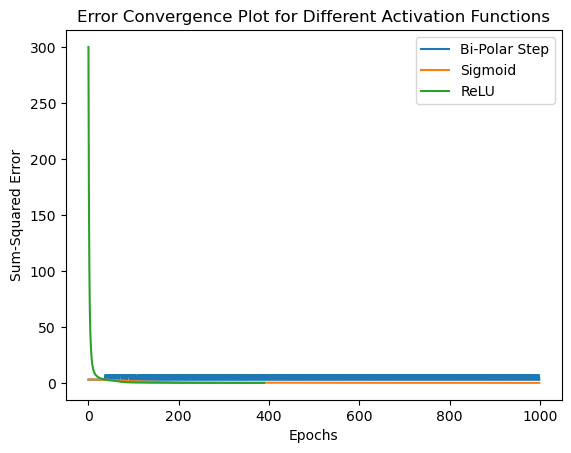

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions

# 1. Bi-Polar Step function
def bipolar_step(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

# 2. Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 3. ReLU function
def relu(x):
    return max(0, x)

# Define the Perceptron model with a flexible activation function
class Perceptron:
    def __init__(self, activation_fn, learning_rate=0.05):
        self.W0 = 10    # Bias term
        self.W1 = 0.2   # Weight for first input
        self.W2 = -0.75 # Weight for second input
        self.lr = learning_rate  # Learning rate
        self.activation_fn = activation_fn  # Set activation function

    def predict(self, x1, x2):
        weighted_sum = self.W0 + self.W1 * x1 + self.W2 * x2
        return self.activation_fn(weighted_sum)
    
    def train(self, X, Y, epochs=1000, convergence_error=0.002):
        epoch_errors = []
        
        for epoch in range(epochs):
            total_error = 0
            for x, y in zip(X, Y):
                x1, x2 = x
                y_pred = self.predict(x1, x2)
                error = y - y_pred
                total_error += error ** 2  # Sum of squared errors

                # Update weights
                self.W0 += self.lr * error
                self.W1 += self.lr * error * x1
                self.W2 += self.lr * error * x2
            
            epoch_errors.append(total_error)
            
            # Stop if converged
            if total_error <= convergence_error:
                print(f"Converged after {epoch+1} epochs.")
                break

        return epoch_errors

# AND Gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
Y = np.array([0, 0, 0, 1])  # Expected output for AND gate

# Train and plot for each activation function
activation_functions = {
    'Bi-Polar Step': bipolar_step,
    'Sigmoid': sigmoid,
    'ReLU': relu
}

for name, activation_fn in activation_functions.items():
    print(f"\nTraining with {name} activation function")
    perceptron = Perceptron(activation_fn, learning_rate=0.05)
    errors = perceptron.train(X, Y)

    # Plot the error over epochs for each activation function
    plt.plot(errors, label=f'{name}')

# Show the comparison plot
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Convergence Plot for Different Activation Functions')
plt.legend()
plt.show()


Training with activation function: Step Function
Training with activation function: Bipolar Step
Training with activation function: Sigmoid
Training with activation function: Tanh
Training with activation function: ReLU
Training with activation function: Leaky ReLU


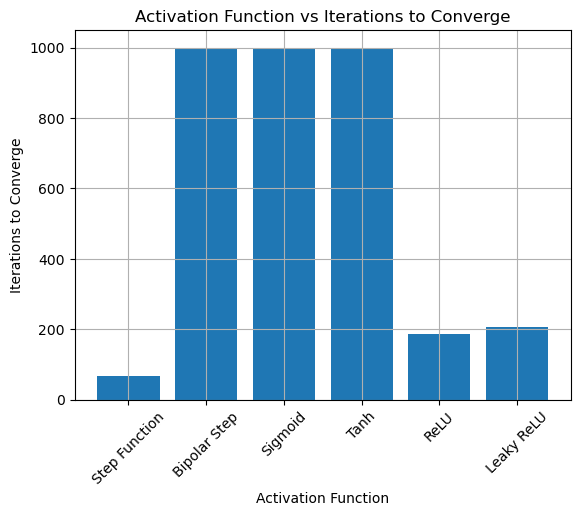

Training with learning rate: 0.1
Training with learning rate: 0.2
Training with learning rate: 0.3
Training with learning rate: 0.4
Training with learning rate: 0.5
Training with learning rate: 0.6
Training with learning rate: 0.7
Training with learning rate: 0.8
Training with learning rate: 0.9
Training with learning rate: 1.0


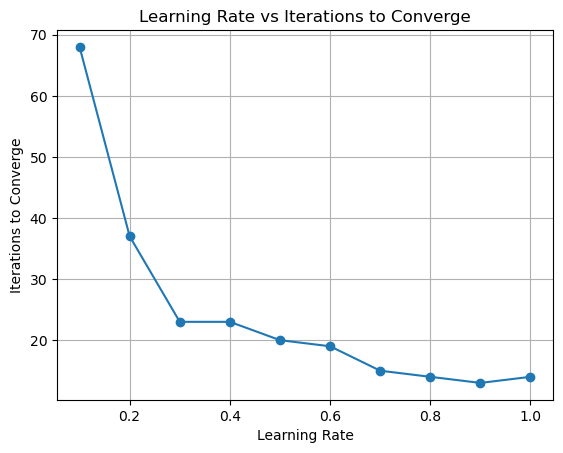

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# a) Summation Unit
def summation_unit(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

# b) Activation Units
def step_function(x):
    return 1 if x > 0 else 0

def bipolar_step(x):
    return 1 if x > 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return max(0, x)

def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# c) Comparator Unit for Error Calculation
def mean_squared_error(predicted, actual):
    return np.mean((predicted - actual) ** 2)

# Perceptron Model
class Perceptron:
    def __init__(self, activation_fn, learning_rate=0.1, W0=10, W1=0.2, W2=-0.75):
        self.W0 = W0  # Bias term
        self.W1 = W1  # Weight for first input
        self.W2 = W2  # Weight for second input
        self.lr = learning_rate  # Learning rate
        self.activation_fn = activation_fn  # Activation function
    
    def predict(self, x1, x2):
        weighted_sum = summation_unit([x1, x2], [self.W1, self.W2], self.W0)
        return self.activation_fn(weighted_sum)
    
    def train(self, X, Y, epochs=1000, convergence_error=0.002):
        epoch_errors = []
        for epoch in range(epochs):
            total_error = 0
            for x, y in zip(X, Y):
                x1, x2 = x
                y_pred = self.predict(x1, x2)
                error = y - y_pred
                total_error += error ** 2  # Sum of squared errors

                # Update weights
                self.W0 += self.lr * error
                self.W1 += self.lr * error * x1
                self.W2 += self.lr * error * x2
            
            epoch_errors.append(total_error)
            
            if total_error <= convergence_error:
                return epoch + 1  # Return the number of iterations (epochs) to converge
        
        return epochs  # Return max epochs if no convergence

# AND Gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
Y = np.array([0, 0, 0, 1])  # Expected output for AND gate

# Experiment with various activation functions
activation_functions = {
    "Step Function": step_function,
    "Bipolar Step": bipolar_step,
    "Sigmoid": sigmoid,
    "Tanh": tanh,
    "ReLU": relu,
    "Leaky ReLU": leaky_relu
}

# Store the results for comparison
activation_results = {}

# Train for each activation function
for name, activation_fn in activation_functions.items():
    print(f"Training with activation function: {name}")
    perceptron = Perceptron(activation_fn=activation_fn, learning_rate=0.1)
    epochs_to_converge = perceptron.train(X, Y)
    activation_results[name] = epochs_to_converge

# Plot the results for different activation functions
plt.bar(activation_results.keys(), activation_results.values())
plt.xlabel('Activation Function')
plt.ylabel('Iterations to Converge')
plt.title('Activation Function vs Iterations to Converge')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Experiment with varying learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
convergence_iterations = []

# Train for each learning rate with Step function
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    perceptron = Perceptron(activation_fn=step_function, learning_rate=lr)
    epochs_to_converge = perceptron.train(X, Y)
    convergence_iterations.append(epochs_to_converge)

# Plot the number of iterations taken for learning to converge
plt.plot(learning_rates, convergence_iterations, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Learning Rate vs Iterations to Converge')
plt.grid(True)
plt.show()


Training with activation function: Step Function
Training with activation function: Bipolar Step
Training with activation function: Sigmoid
Training with activation function: Tanh
Training with activation function: ReLU


C:\Users\sharm\AppData\Local\Temp\ipykernel_19264\754020503.py:64: RuntimeWarning: overflow encountered in scalar power
  total_error += np.sum(error ** 2)  # Sum of squared errors
C:\Users\sharm\AppData\Local\Temp\ipykernel_19264\754020503.py:68: RuntimeWarning: overflow encountered in scalar multiply
  delta_output = error * y_pred * (1 - y_pred)  # Derivative of activation (Sigmoid derivative)
C:\Users\sharm\AppData\Local\Temp\ipykernel_19264\754020503.py:69: RuntimeWarning: invalid value encountered in multiply
  self.W1_output += self.lr * delta_output * hidden_output


Training with activation function: Leaky ReLU


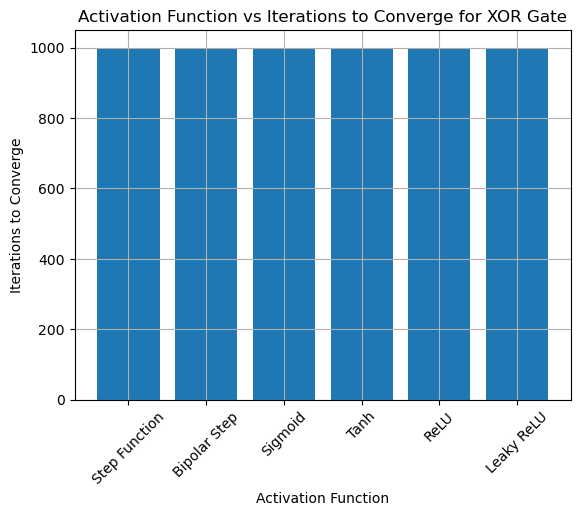

Training with learning rate: 0.1
Training with learning rate: 0.2
Training with learning rate: 0.3
Training with learning rate: 0.4
Training with learning rate: 0.5
Training with learning rate: 0.6
Training with learning rate: 0.7
Training with learning rate: 0.8
Training with learning rate: 0.9
Training with learning rate: 1.0


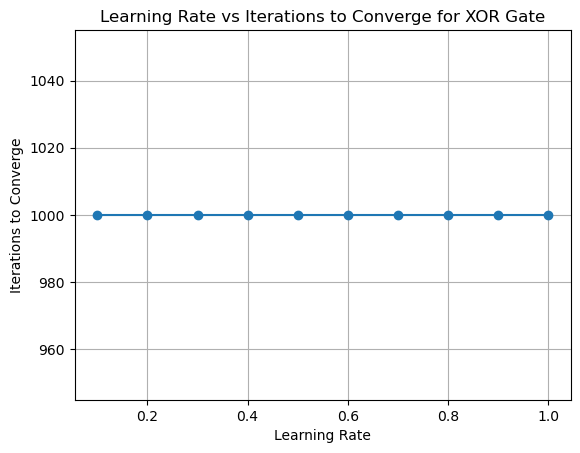

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# a) Summation Unit
def summation_unit(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

# b) Activation Units (element-wise)
def step_function(x):
    return np.where(x > 0, 1, 0)

def bipolar_step(x):
    return np.where(x > 0, 1, -1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# c) Comparator Unit for Error Calculation
def mean_squared_error(predicted, actual):
    return np.mean((predicted - actual) ** 2)

# Two-Layer Perceptron for XOR Gate
class XORPerceptron:
    def __init__(self, activation_fn, learning_rate=0.1):
        # Input Layer to Hidden Layer Weights and Biases
        self.W0_hidden = np.random.randn(2, 2)  # 2 inputs, 2 hidden nodes
        self.B0_hidden = np.random.randn(2)
        
        # Hidden Layer to Output Layer Weights and Bias
        self.W1_output = np.random.randn(2)  # 2 hidden nodes to 1 output
        self.B1_output = np.random.randn()
        
        self.lr = learning_rate  # Learning rate
        self.activation_fn = activation_fn  # Activation function
    
    def forward(self, x):
        # Forward pass through hidden layer
        hidden_output = self.activation_fn(summation_unit(x, self.W0_hidden, self.B0_hidden))
        # Forward pass through output layer
        final_output = self.activation_fn(summation_unit(hidden_output, self.W1_output, self.B1_output))
        return hidden_output, final_output
    
    def predict(self, x1, x2):
        hidden_output, final_output = self.forward(np.array([x1, x2]))
        return final_output
    
    def train(self, X, Y, epochs=1000, convergence_error=0.002):
        epoch_errors = []
        for epoch in range(epochs):
            total_error = 0
            for x, y in zip(X, Y):
                x1, x2 = x
                hidden_output, y_pred = self.forward(np.array([x1, x2]))
                error = y - y_pred
                total_error += np.sum(error ** 2)  # Sum of squared errors

                # Backpropagation and weight updates
                # Update output layer weights
                delta_output = error * y_pred * (1 - y_pred)  # Derivative of activation (Sigmoid derivative)
                self.W1_output += self.lr * delta_output * hidden_output
                self.B1_output += self.lr * delta_output
                
                # Update hidden layer weights
                delta_hidden = delta_output * self.W1_output * hidden_output * (1 - hidden_output)
                self.W0_hidden += self.lr * np.outer(delta_hidden, x)
                self.B0_hidden += self.lr * delta_hidden
            
            epoch_errors.append(total_error)
            
            if total_error <= convergence_error:
                return epoch + 1  # Return the number of iterations (epochs) to converge
        
        return epochs  # Return max epochs if no convergence

# XOR Gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
Y = np.array([0, 1, 1, 0])  # Expected output for XOR gate

# Experiment with various activation functions
activation_functions = {
    "Step Function": step_function,
    "Bipolar Step": bipolar_step,
    "Sigmoid": sigmoid,
    "Tanh": tanh,
    "ReLU": relu,
    "Leaky ReLU": leaky_relu
}

# Store the results for comparison
activation_results = {}

# Train for each activation function
for name, activation_fn in activation_functions.items():
    print(f"Training with activation function: {name}")
    xor_perceptron = XORPerceptron(activation_fn=activation_fn, learning_rate=0.05)
    epochs_to_converge = xor_perceptron.train(X, Y)
    activation_results[name] = epochs_to_converge

# Plot the results for different activation functions
plt.bar(activation_results.keys(), activation_results.values())
plt.xlabel('Activation Function')
plt.ylabel('Iterations to Converge')
plt.title('Activation Function vs Iterations to Converge for XOR Gate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Experiment with varying learning rates for XOR gate using Sigmoid activation
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
convergence_iterations = []

# Train for each learning rate with Sigmoid activation
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    xor_perceptron = XORPerceptron(activation_fn=sigmoid, learning_rate=lr)
    epochs_to_converge = xor_perceptron.train(X, Y)
    convergence_iterations.append(epochs_to_converge)

# Plot the number of iterations taken for learning to converge with varying learning rates
plt.plot(learning_rates, convergence_iterations, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Learning Rate vs Iterations to Converge for XOR Gate')
plt.grid(True)
plt.show()
